Accuracy: 0.83


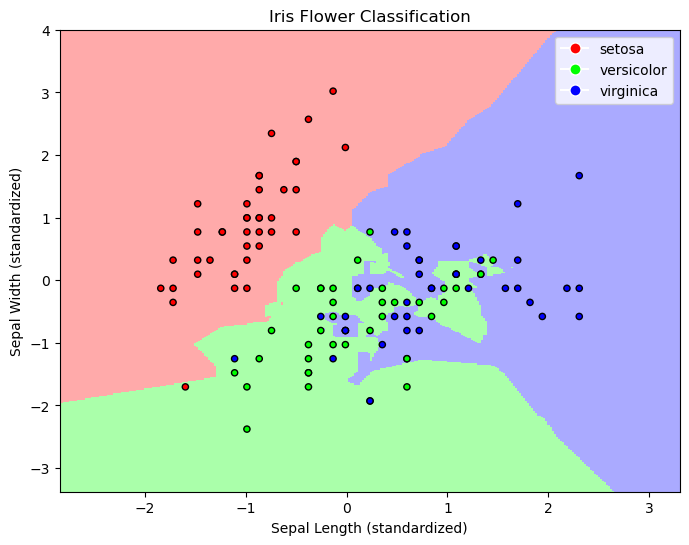

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('C:\\Users\\Deep\\Desktop\\IRIS.csv')

# Split data into features (X) and target (y)
X = data.drop('species', axis=1)
y = data['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert class labels to numerical values
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_train_mapped = y_train.map(class_mapping)

# Train the K-Nearest Neighbors classifier
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled[:, :2], y_train_mapped)  # Use only the first two features for visualization

# Create a meshgrid for plotting
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the meshgrid
mesh_predictions = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert predictions to the same shape as xx and yy
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled[:, :2])  # Use only the first two features for visualization

# Calculate accuracy
y_pred_mapped = pd.Series(y_pred).map({v: k for k, v in class_mapping.items()})

accuracy = accuracy_score(y_test, y_pred_mapped)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the classification results
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, mesh_predictions, cmap=cmap_light)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_mapped, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris Flower Classification")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")

legend_labels = ['setosa', 'versicolor', 'virginica']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color) for label, color in zip(legend_labels, ['#FF0000', '#00FF00', '#0000FF'])])

plt.show()
